In [2]:
import pandas as pd
import plotly.express as px

In [3]:
data=pd.read_csv('Titanic-Dataset.csv',index_col='PassengerId')
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
#Checking missing values
data.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [5]:
#missing value precentage
print((data.isnull().sum()/len(data))*100)

Survived     0.000000
Pclass       0.000000
Name         0.000000
Sex          0.000000
Age         19.865320
SibSp        0.000000
Parch        0.000000
Ticket       0.000000
Fare         0.000000
Cabin       77.104377
Embarked     0.224467
dtype: float64


In [6]:
#handeling missing values
data['Age']=data['Age'].fillna(data['Age'].median())

In [7]:
data=data.drop('Cabin' ,axis=1)

In [8]:
data['Embarked']=data['Embarked'].fillna(data['Embarked'].mode()[0])

In [9]:
#data after cleaning
data.isna().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

### a) Survival count

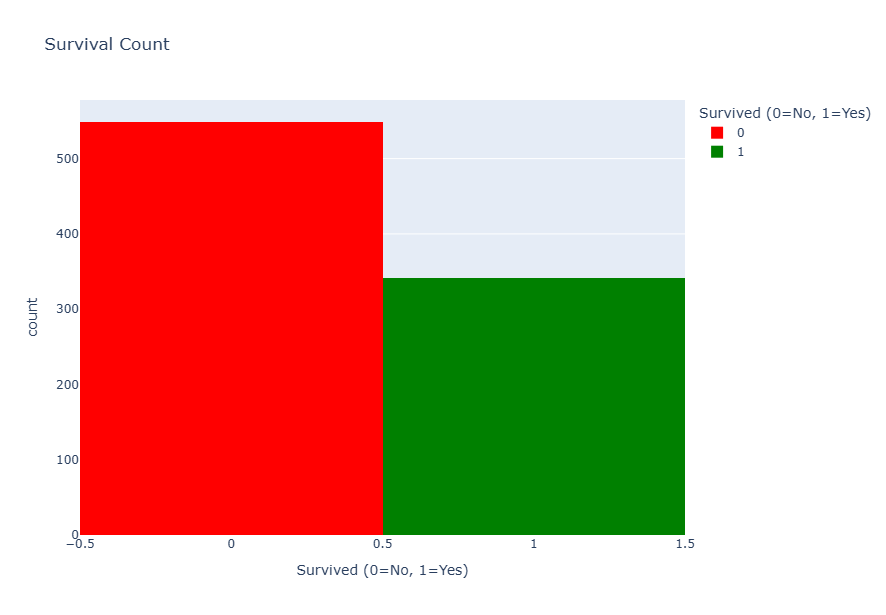

In [10]:
fig = px.histogram(data, x='Survived', color='Survived',
                   title='Survival Count',
                   labels={'Survived': 'Survived (0=No, 1=Yes)'},
                   color_discrete_map={0: 'red', 1: 'green'})

# Increase size
fig.update_layout(width=900, height=600)  # width in pixels, height in pixels
fig.show()



### Survival Count

This histogram shows the total number of passengers who survived vs those who did not survive.

- **X-axis:** Survival status (0 = Did not survive, 1 = Survived)  
- **Y-axis:** Number of passengers  
- The red bar represents passengers who did not survive, and the green bar represents passengers who survived.  
- Observation: More passengers **did not survive** than survived on the Titanic.


### b) Survival by Class

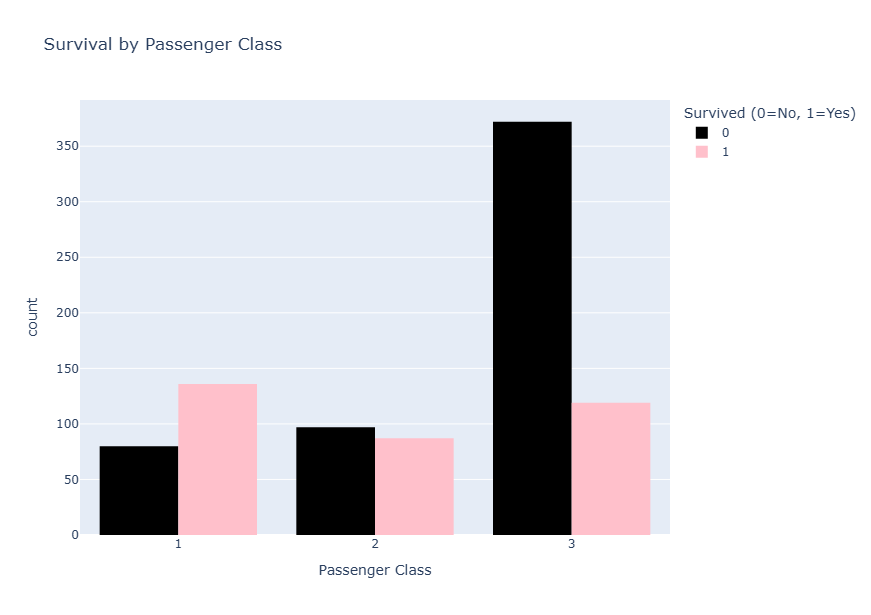

In [11]:

# Plot histogram
fig = px.histogram(data, x='Pclass', color='Survived', barmode='group',
                   title='Survival by Passenger Class',
                   labels={'Pclass': 'Passenger Class', 'Survived': 'Survived (0=No, 1=Yes)'},
                   color_discrete_map={0: 'black', 1: 'pink'})

# Increase plot size
fig.update_layout(width=1000, height=600)

# Show plot
fig.show()



### Survival by Passenger Class

This plot shows how survival varies across passenger classes (1 = First, 2 = Second, 3 = Third).

- **X-axis:** Passenger Class  
- **Color:** Survival status (0 = Did not survive, 1 = Survived)  
- **Barmode group:** Makes survived and non-survived bars side by side.  
- Observation: Passengers in **First Class had a higher survival rate** compared to Third Class.


### c) Age vs Fare colored by Survival

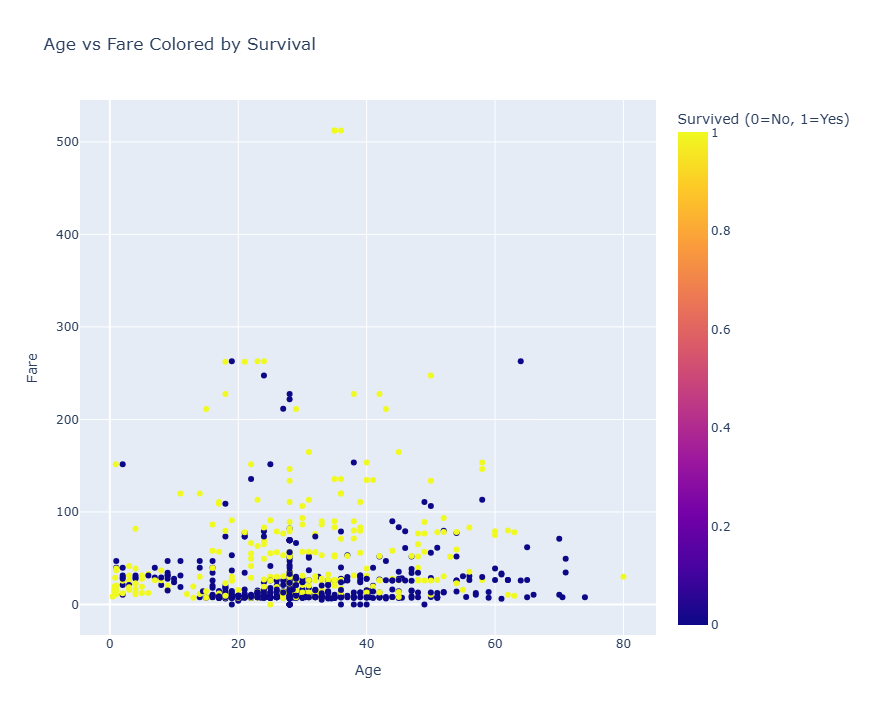

In [12]:
fig = px.scatter(data, x='Age', y='Fare', color='Survived',
                 title='Age vs Fare Colored by Survival',
                 labels={'Survived': 'Survived (0=No, 1=Yes)'},
                 hover_data=['Name', 'Sex', 'Pclass'])

# Increase size
fig.update_layout(width=1000, height=700)
fig.show()


### Age vs Fare Colored by Survival

This scatter plot shows the relationship between a passenger's age and the fare they paid, colored by survival.

- **X-axis:** Age of passengers  
- **Y-axis:** Fare paid  
- **Color:** Survival status (0 = Did not survive, 1 = Survived)  
- Observation: Younger passengers and those who paid higher fares (mostly First Class) **tended to survive more**.


### d) Boxplot of Age by Survival

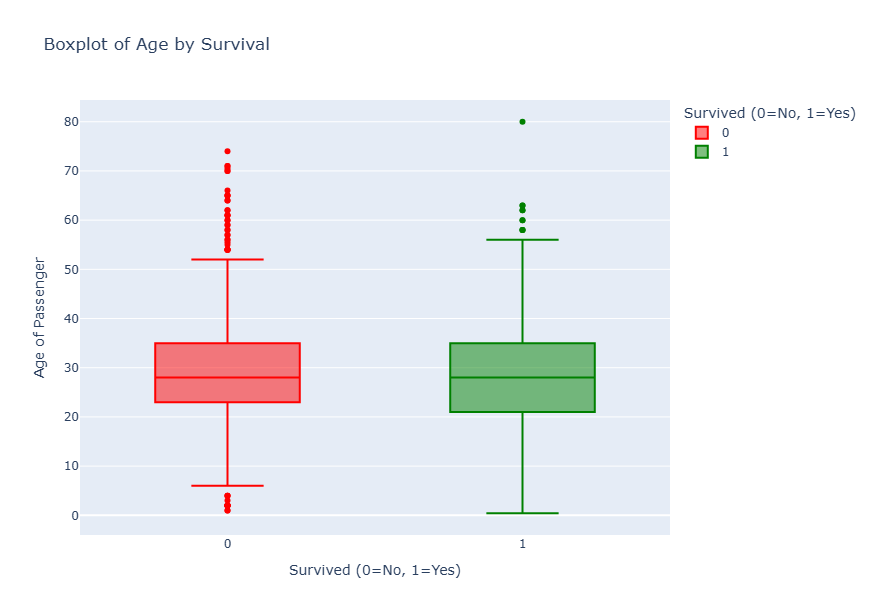

In [13]:

fig = px.box(data, x='Survived', y='Age', color='Survived',
             title='Boxplot of Age by Survival',
             labels={'Survived': 'Survived (0=No, 1=Yes)', 'Age': 'Age of Passenger'},
             color_discrete_map={0: 'red', 1: 'green'})

# Increase plot size
fig.update_layout(width=1000, height=600)

# Show plot
fig.show()


### Boxplot of Age by Survival

This boxplot shows the distribution of passenger ages for those who survived and those who did not.

- **X-axis:** Survival status (0 = Did not survive, 1 = Survived)  
- **Y-axis:** Age of passengers  
- Observation: Median age of survivors is slightly **lower**, and most survivors were between ages **20–40**. There are also some **older survivors** (outliers).


### e) Bar chart of survival by gender

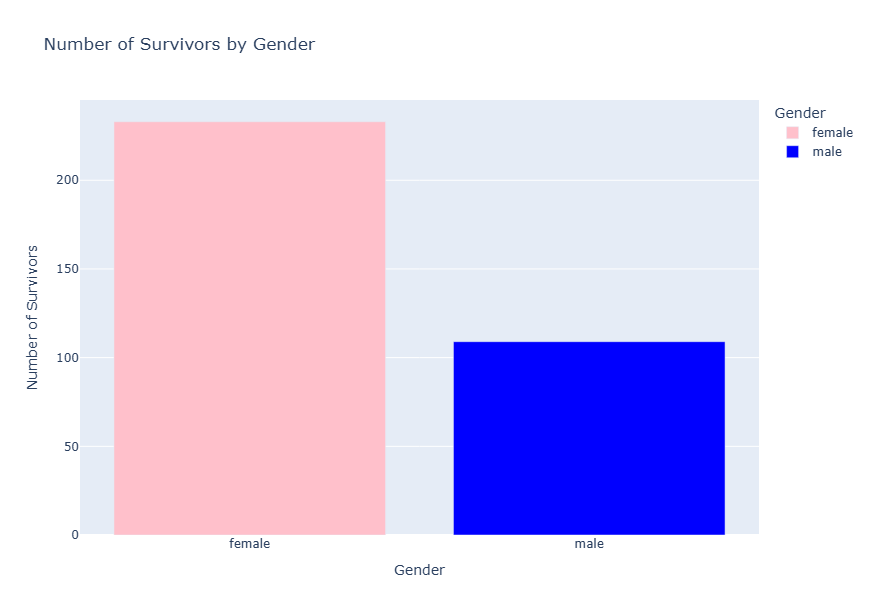

In [20]:

# Group data by gender and sum survivors
gender_survival = data.groupby('Sex')['Survived'].sum().reset_index()

# Plot bar chart
fig = px.bar(gender_survival, x='Sex', y='Survived', color='Sex',
             title='Number of Survivors by Gender',
             labels={'Survived': 'Number of Survivors', 'Sex': 'Gender'},
             color_discrete_map={'male': 'blue', 'female': 'pink'})

# Increase plot size
fig.update_layout(width=900, height=600)

# Show plot
fig.show()



### Number of Survivors by Gender

This bar chart shows the number of male and female passengers who survived.

- **X-axis:** Gender  
- **Y-axis:** Number of survivors  
- Observation: **Females survived in higher numbers** compared to males, which aligns with the “women and children first” rule during evacuation.


### Pie Chart of Survival

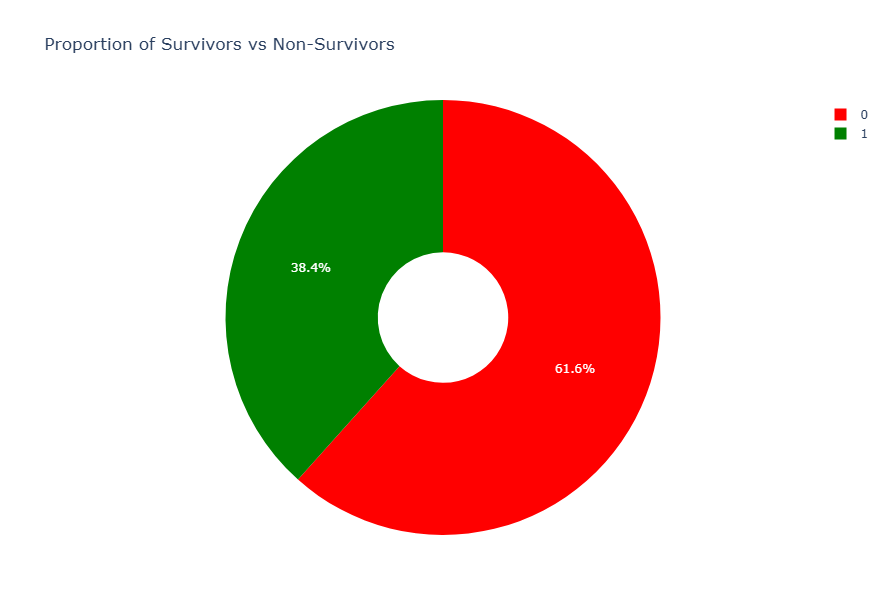

In [19]:
# Count how many survived and did not survive
survival_counts = data['Survived'].value_counts().reset_index()
survival_counts.columns = ['Survived', 'Count']
import plotly.express as px

fig = px.pie(survival_counts, names='Survived', values='Count',
             title='Proportion of Survivors vs Non-Survivors',
             color='Survived',
             color_discrete_map={0:'red', 1:'green'},
             hole=0.3)  # optional donut style

# Increase size
fig.update_layout(width=900, height=600)

fig.show()



### Proportion of Survivors vs Non-Survivors

This pie chart shows the overall proportion of passengers who survived vs those who did not.

- Red slice → Did not survive  
- Green slice → Survived  
- Observation: About **61% of passengers did not survive**, while **39% survived**, showing a high fatality rate.
